In [29]:
from google.colab import files
upload = files.upload()

Saving Dataset_project_v1.csv to Dataset_project_v1.csv


In [30]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [31]:
text = pd.read_csv('Dataset_project_v1.csv')

In [32]:
cleaned_text = text.copy()

In [33]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
text.head()

,Unnamed: 0,Keywords,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,Legal; Law; Explainable AI; Blockchain; Genera...,NaN,NaN,NaN,NaN,NaN
1,1,AI governance; AI regulation; generative AI; g...,NaN,NaN,NaN,NaN,NaN
2,2,Generative AI; innovation diffusion; TOE frame...,NaN,NaN,NaN,NaN,NaN
3,3,Generative AI; Telecom; 6 G; 5 G; Survey; Appl...,NaN,NaN,NaN,NaN,NaN
4,4,Generative AI; Large language models; Generati...,NaN,NaN,NaN,NaN,NaN


In [35]:
print(text.columns)


Index(['Unnamed: 0', ' Keywords', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


Visualize keyword frequencies to better understand the most prominent terms in your dataset.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


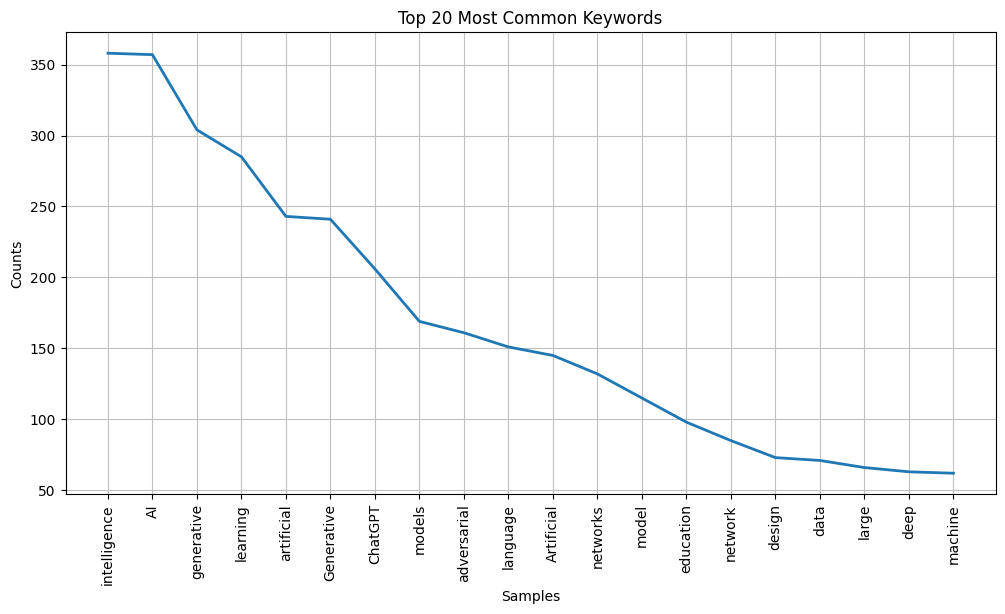

In [36]:
import re
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure that the necessary NLTK resources are downloaded
nltk.download('punkt')

# Cleaning function to remove punctuation
def clean_keyword(keyword):
    # Remove all non-word characters (punctuation, etc.), keep only text and numbers
    return re.sub(r'[^\w\s]', '', keyword)

# Apply the cleaning function to each keyword
cleaned_text[' Keywords'] = cleaned_text[' Keywords'].fillna('')  # Replace NaN with empty string
cleaned_text[' Keywords'] = cleaned_text[' Keywords'].apply(lambda x: x if isinstance(x, str) else str(x))
cleaned_text[' Keywords'] = cleaned_text[' Keywords'].apply(clean_keyword)

# Tokenize the keywords column, ensuring inputs are strings
cleaned_text[' Keywords'] = cleaned_text[' Keywords'].apply(nltk.word_tokenize)

# Flatten the list of lists to create a single list of keywords
all_keywords = sum(cleaned_text[' Keywords'], [])

# Checking if the list is empty to avoid errors during plotting
if not all_keywords:
    print("No keywords to display. Check your data.")
else:
    # Calculate frequency distribution of keywords
    freq_dist = FreqDist(all_keywords)

    # Plot the most common keywords
    plt.figure(figsize=(12, 6))
    freq_dist.plot(20, title='Top 20 Most Common Keywords')
    plt.show()


In [37]:
split_columns = text[' Keywords'].str.split(';', expand=True)

This line of code is working with a pandas DataFrame ( text). Specifically, it is addressing the column ' Keywords', which contains keyword data presumably as a semicolon-separated string

In [38]:
split_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Legal,Law,Explainable AI,Blockchain,Generative AI,Responsible AI,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,AI governance,AI regulation,generative AI,generative models,inspectability,large language models,modifiability,observability,regulatory objects,None,...,None,None,None,None,None,None,None,None,None,None
2,Generative AI,innovation diffusion,TOE framework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Generative AI,Telecom,6 G,5 G,Survey,Application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Generative AI,Large language models,Generative adversarial networks,Harms,Power,Inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [39]:
# Converting all the words in the expanded keywords dataframe to lower case.
keywords_expanded_lowercase = split_columns.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Preview the dataframe with all words in lower case.
keywords_expanded_lowercase.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,legal,law,explainable ai,blockchain,generative ai,responsible ai,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,ai governance,ai regulation,generative ai,generative models,inspectability,large language models,modifiability,observability,regulatory objects,None,...,None,None,None,None,None,None,None,None,None,None
2,generative ai,innovation diffusion,toe framework,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,generative ai,telecom,6 g,5 g,survey,application,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative ai,large language models,generative adversarial networks,harms,power,inequality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [40]:
# Calculating frequency distribution of all words across the entire dataframe
from collections import Counter

# Flatten the dataframe to a single list of all words, excluding None values
all_words = keywords_expanded_lowercase.stack().tolist()

# Calculate the frequency distribution
word_freq = Counter(all_words)

# Convert the Counter object to a dataframe for better readability
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

word_freq_df.head()

,Word,Frequency
101,artificial intelligence,251
25,chatgpt,216
4,generative ai,144
228,deep learning,79
21,generative adversarial networks,78


In [ ]:
import networkx as nx

# Initialize an undirected graph
G = nx.Graph()

# Loop through each row in the dataframe and add edges between every pair of keywords within a row
for index, row in keywords_expanded_lowercase.iterrows():
    # Filter out None values and convert to a list
    keywords_list = [keyword for keyword in row if keyword is not None]

    # Add nodes and edges for each keyword in the list
    for i in range(len(keywords_list)):
        for j in range(i + 1, len(keywords_list)):
            # If the edge already exists, increment the weight
            if G.has_edge(keywords_list[i], keywords_list[j]):
                G[keywords_list[i]][keywords_list[j]]['weight'] += 1
            else:
                G.add_edge(keywords_list[i], keywords_list[j], weight=1)

# Basic information about the graph to understand its size and complexity
print(G)

Graph with 2990 nodes and 15184 edges


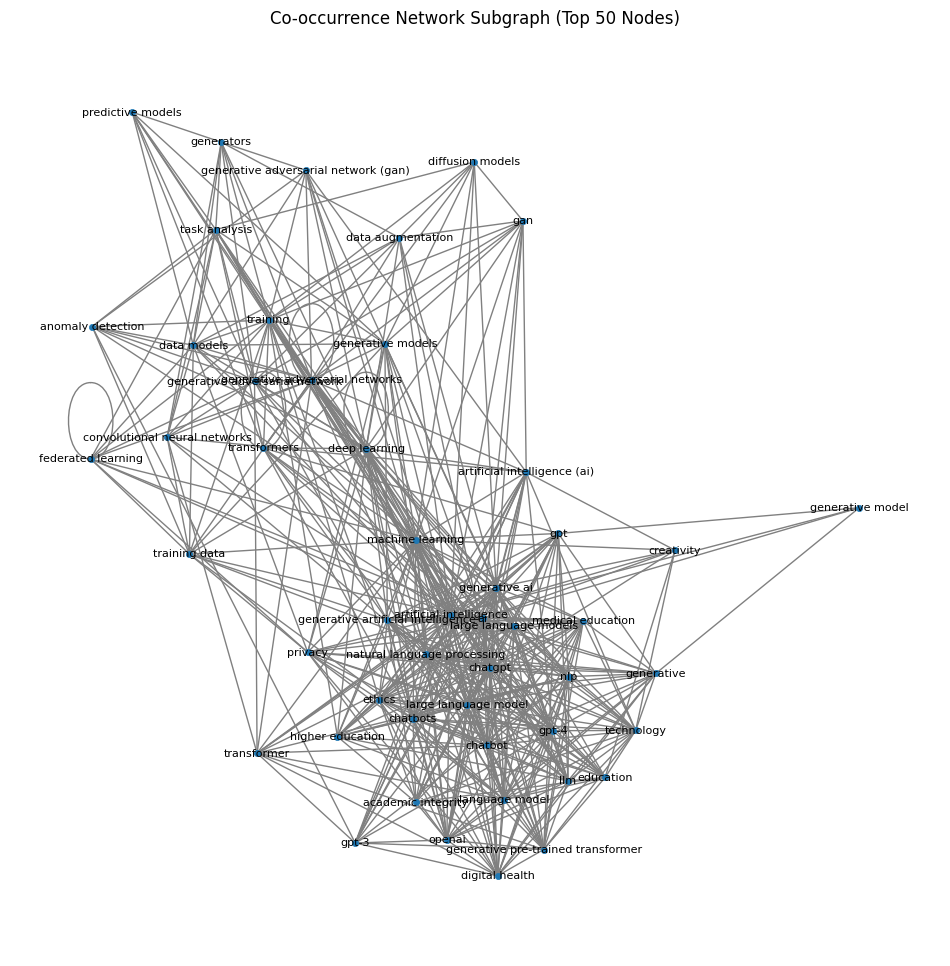

In [ ]:
import matplotlib.pyplot as plt

# Since the graph is large, plotting it directly may not be very informative due to overplotting.
# For demonstration, we'll plot a smaller subgraph of the 50 most connected nodes.
subgraph_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
subgraph = G.subgraph([node[0] for node in subgraph_nodes])

# Plotting the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)  # For consistent layout
nx.draw_networkx(subgraph, pos, node_size=20, with_labels=True, font_size=8, edge_color="gray", linewidths=0.5)
plt.title("Co-occurrence Network (Top 50 Nodes)")
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
# Calculating the adjacency matrix of the entire graph
adj_matrix = nx.adjacency_matrix(G)

# Converting the adjacency matrix to a DataFrame for better readability
adj_matrix_df = pd.DataFrame(adj_matrix.todense(), index=G.nodes(), columns=G.nodes())

# Since the adjacency matrix is large, displaying the whole matrix isn't practical. Let's show a small portion.
adj_matrix_df.iloc[:10, :10]

,legal,law,explainable ai,blockchain,generative ai,responsible ai,ai governance,ai regulation,generative models,inspectability
legal,0,1,1,1,1,1,0,0,0,0
law,1,0,1,1,1,1,0,0,0,0
explainable ai,1,1,0,1,2,1,0,0,1,0
blockchain,1,1,1,0,1,1,0,0,0,0
generative ai,1,1,2,1,0,1,3,2,2,1
responsible ai,1,1,1,1,1,0,0,0,0,0
ai governance,0,0,0,0,3,0,0,1,1,1
ai regulation,0,0,0,0,2,0,1,0,1,1
generative models,0,0,1,0,2,0,1,1,0,1
inspectability,0,0,0,0,1,0,1,1,1,0


Understanding the degree distribution can help you identify nodes that are central or important (e.g., hubs in a network)

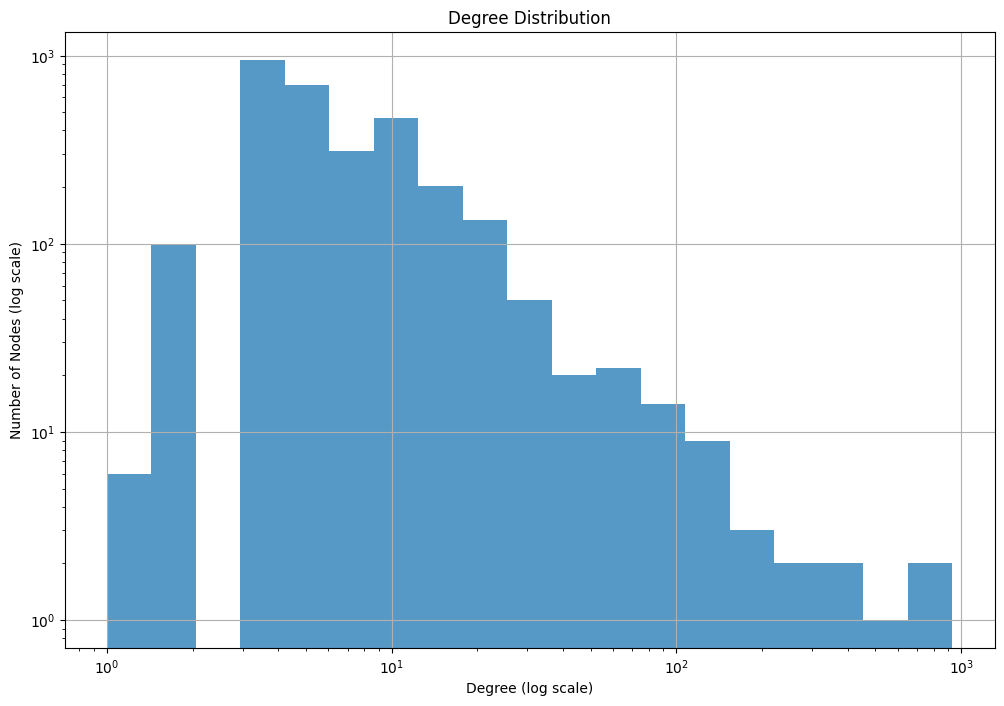

In [44]:
import numpy as np

degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(12, 8))

# Logarithmic binning
bin_edges = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=20)
plt.hist(degrees, bins=bin_edges, alpha=0.75)

# Logarithmic axes
plt.xscale('log')
plt.yscale('log')

plt.title('Degree Distribution')
plt.xlabel('Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.grid(True)
plt.show()


Using centrality measures, you can find which nodes are most "central" in your network, according to different criteria

In [43]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# You can then examine these to find key nodes
important_nodes_by_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
important_nodes_by_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

print(f"Nodes with highest degree centrality: {important_nodes_by_degree[:5]}")
print(f"Nodes with highest betweenness centrality: {important_nodes_by_betweenness[:5]}")


Nodes with highest degree centrality: ['artificial intelligence', 'chatgpt', 'generative ai', 'deep learning', 'generative adversarial networks']
Nodes with highest betweenness centrality: ['artificial intelligence', 'chatgpt', 'generative ai', 'deep learning', 'generative adversarial networks']


The clustering coefficient gives an idea of the degree to which nodes in a graph tend to cluster together

In [45]:
clustering_coefficient = nx.clustering(G)
# You can then examine the clustering coefficient of nodes
print(f"Average clustering coefficient: {nx.average_clustering(G)}")


Average clustering coefficient: 0.9156660506039467


Check for and remove any nodes that have nan as their label

In [48]:
import networkx as nx
import math

# Create a new graph from the original to avoid modifying it directly
H = nx.Graph(G)

# Remove 'nan' nodes if they exist
H.remove_nodes_from([n for n in H.nodes() if isinstance(n, float) and math.isnan(n)])

# Now, remove self-loops and parallel edges
H.remove_edges_from(nx.selfloop_edges(H))


Discovering communities within the graph can reveal the modular structure

In [49]:
from networkx.algorithms import community

# This is a simple community detection method based on greedy modularity optimization
communities = community.greedy_modularity_communities(H)

# View the nodes in each community
for i, com in enumerate(communities):
    print(f"Community {i}: {sorted(com)}")


Community 0: ['4th industrial revolution', '5', 'abstract', 'abstracts', 'academic integrity', 'academic integrity policy development', 'academic libraries', 'academic publishing', 'academic research', 'academic writing', 'academics', 'accuracy', 'adaptive learning', 'adoption', 'advertising graphic', 'aerobert', 'agricultural injury', 'ai', 'ai & law', 'ai & robotics healthcare', 'ai act', 'ai alignment', 'ai applications', 'ai bots', 'ai chatbot', 'ai chatbot.', 'ai chatbots', 'ai curriculum', 'ai detection', 'ai detectors', 'ai generated art', 'ai generated content (aigc)', 'ai hallucination', 'ai in accounting', 'ai in education', 'ai in medical education', 'ai in medicine', 'ai in tourism', 'ai integration', 'ai model', 'ai models', 'ai opinions', 'ai policy', 'ai policy framework', 'ai prompt engineering', 'ai risks and safety', 'ai safety', 'ai tool', 'ai tools', 'ai-assisted learning', 'ai-chatbot', 'ai-driven feedback', 'ai-enabled assistants', 'ai-generated corpus', 'ai-gener